In [1]:
%matplotlib inline


# Reconhecimento de digitos escritos à mão

Este exemplo mostra como o scikit-learn pode ser usado para reconhecer imagens de dígitos escritos à mão, de 0-9


In [2]:
print(__doc__)

# Author: Gael Varoquaux
# License: BSD 3 clause

# importação de bibliotecas padrões
import matplotlib.pyplot as plt

# Importação de datasets, classificadores and métricas de performance
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Automatically created module for IPython interactive environment


## Dataset de dígitos

Os dígitos do dataset consistem em imagens pixeladas 8x8 dos dígitos.

Os atributos das imagens armazenam um array 8x8 de valores de escala de cinza para cada imagem.

Os arrays serão utilizados para vusualizar as imagens logo  abaixo. O atributo alvo do dataset armazena o dígito que cada imagem representa e este está incluído no tíutlo das imagens.



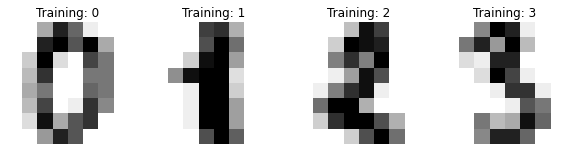

In [3]:
#carrega o dataset
digits = datasets.load_digits()

#mostra as imagens
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classificação

Para aplicar o classificador neste dataset é necessário transformar a matriz em um vetor de 64 posições
O dataset será da forma ``(n_samples, n_features)``, onde ``n_samples`` é o número de imagens e ``n_features`` é o número de pixels de cada imagem.

Nós podemos dividir os dados em dois conjuntos, um de treino e um de teste e ajustar o classficador. Com o classificador ajustado pode-se realizar a predição do conjunto de teste.


In [27]:
# imagens
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classificadores = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=0.001),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Criando um classificador: clssificador vetor suporte
#clf = svm.SVC(gamma=0.001)
#clf = classificadores[4]
clf = DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(n_estimators=100)
# Dividindo os dados em dois conjuntos  50% treino e 50% teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False)

# apredendo os digitos com o conjunto de treino
clf.fit(X_train, y_train)

# Predizendo os valores dos dígitos do conjunto de teste
predicted = clf.predict(X_test)
n_samples, len(predicted), predicted

(1797,
 180,
 array([5, 8, 8, 0, 8, 7, 6, 3, 2, 2, 4, 7, 2, 3, 8, 3, 7, 8, 7, 6, 1, 4,
        3, 8, 4, 0, 5, 3, 4, 9, 4, 2, 1, 5, 4, 4, 7, 8, 8, 5, 7, 3, 5, 7,
        4, 9, 0, 8, 7, 8, 0, 8, 8, 5, 4, 5, 6, 7, 8, 3, 0, 1, 8, 8, 4, 5,
        6, 1, 3, 3, 0, 8, 8, 8, 4, 5, 6, 7, 3, 9, 0, 3, 5, 3, 6, 5, 0, 9,
        8, 9, 8, 4, 8, 7, 8, 8, 5, 8, 0, 0, 6, 2, 7, 8, 2, 0, 8, 2, 6, 8,
        8, 8, 1, 8, 4, 6, 6, 6, 4, 3, 8, 4, 0, 3, 4, 7, 3, 8, 0, 0, 4, 7,
        6, 8, 8, 8, 7, 4, 6, 3, 8, 8, 3, 8, 7, 6, 8, 4, 3, 1, 1, 0, 5, 3,
        6, 3, 6, 8, 7, 5, 4, 4, 7, 8, 3, 2, 2, 4, 7, 3, 2, 4, 8, 8, 4, 3,
        0, 8, 3, 8]))

4 exemplos de imagens e seus valores preditos



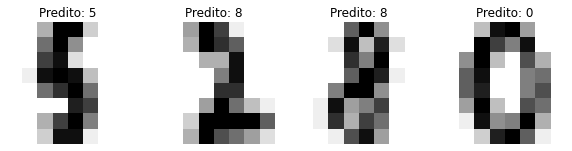

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predito: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [29]:
print(f"Relatório de métricas de qualidade da classificação {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Relatório de métricas de qualidade da classificação DecisionTreeClassifier(max_depth=5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.29      0.11      0.15        19
           2       0.60      0.35      0.44        17
           3       0.33      0.44      0.38        18
           4       0.71      0.85      0.77        20
           5       0.93      0.72      0.81        18
           6       0.94      0.83      0.88        18
           7       0.74      0.74      0.74        19
           8       0.27      0.71      0.39        17
           9       1.00      0.28      0.43        18

    accuracy                           0.60       180
   macro avg       0.68      0.60      0.60       180
weighted avg       0.68      0.60      0.60       180




Nós podemos plotar a matrix de confusão `confusion matrix <confusion_matrix>` dos dígitos reais e dos dígitos preditos.



Matriz de Confusão:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  0  1  0  0  0 14  0]
 [ 0  0  6  0  0  0  1  1  9  0]
 [ 0  1  0  8  0  1  0  0  8  0]
 [ 0  1  0  0 17  0  0  2  0  0]
 [ 0  0  1  1  3 13  0  0  0  0]
 [ 0  0  1  0  2  0 15  0  0  0]
 [ 0  2  0  0  1  0  0 14  2  0]
 [ 0  1  0  4  0  0  0  0 12  0]
 [ 0  0  0 11  0  0  0  2  0  5]]


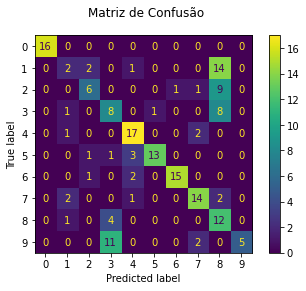

In [30]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()